# Introduction

* This content has stroke_prediction dataset,

* The stroke prediction data set trying to guess to stroke status in dependent some features where features below.
* The data set is also imbalanced and good experiences for me. 

### Features 

* id
* gender 
* age
* hypertension
* heart_disease 
* ever_married 
* work_type 
* Residence_type 
* avg_glucose_level
* bmi 
* smoking_status
* stroke(Label)

### Content 

* Imported data
* Load to data
* Tried to understand data 
* Control the missing value 
* Feature engineering
  * Correlation numerical values
  * Smoking status by gender type and relation with stroke 
  * Smoking status by work type relation with stroke
  * Smoking status by age mean relation with stroke
  * Smoking status by avg_glucose_level mean relation with stroke
  * Smoking status by bmi mean relation with stroke
  * Genaral visualization for that we did feature engineering
  * Density map of numerical values(hypertension; age and bmi level relation)
* Examined to median values in numerical values 
* Control the outlier values for numerical values 
* Filling the missing value  
* Obtained training and testing variables for learning proceses 
  * Encoding catagorical features with label encoder for learning processes
* Train and test splitting and try to balanced labels
* Normalization for continous columns
* Implement the PCA(Principle Component Analysis) data and 2D visualization
* Learning time!
  * Optimization hyperparameters with RandomizedSearchCV
    * Logistic Regression 
      * Fitting and testing model
    * Knn Classification 
      * Fitting and testing model
    * Decision Tree Classification 
      * Fitting and testing model




## Imported libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')
from collections import Counter

* We want use style dark grid 
* Ignoring warnings 
* We will use Counter function for outlier step for counting in list values

## Load the data 

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Tried to understand data 

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Control the missing value

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* We can see 201 value null elements in 'bmi' feature we should fill the values with availaible median value

## Feature engineering

### Correlation numerical values

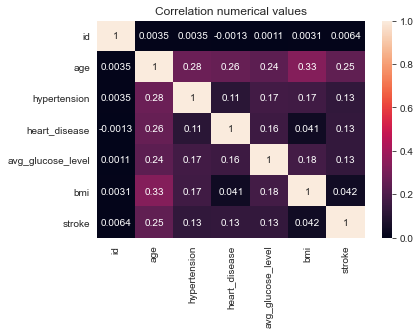

In [7]:
sns.heatmap(data.corr() , annot = True)
plt.title('Correlation numerical values')
plt.show()

Comment : The features mainly that has no correlation enough for processes

### Smoking status by gender type and relation with stroke 

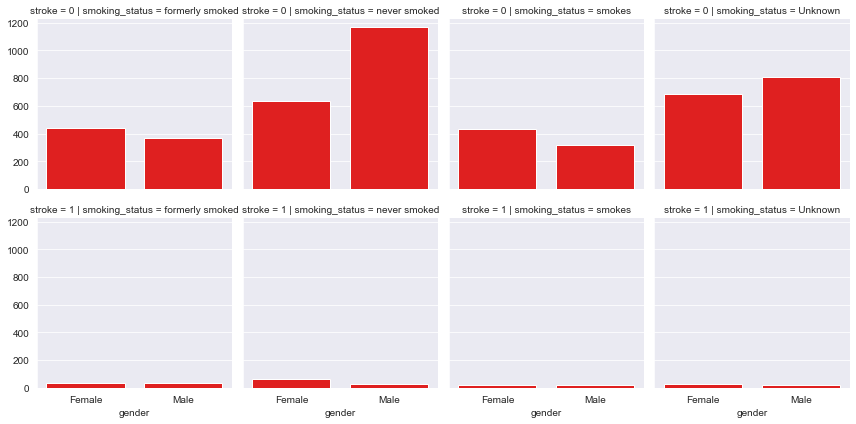

In [8]:
g = sns.FacetGrid(data , row = 'stroke' , col = 'smoking_status')
g.map(sns.countplot , 'gender' , color = 'red')
plt.show()

### Smoking status by work type relation with stroke status

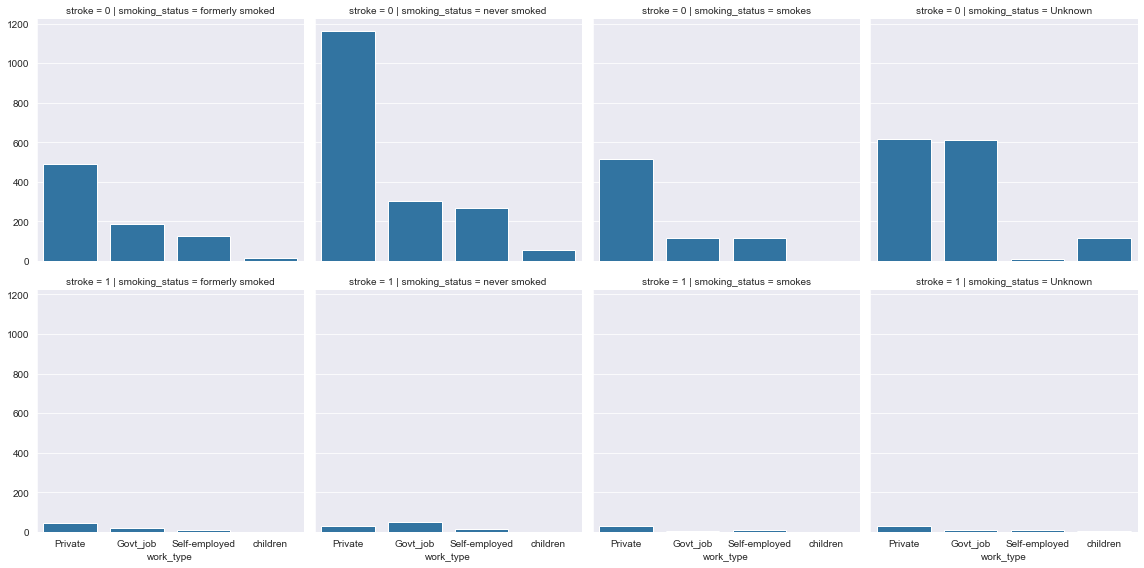

In [9]:
g = sns.FacetGrid(data , row = 'stroke' , col = 'smoking_status' , size = 4)
g.map(sns.countplot , 'work_type')
plt.show()

### Smoking status by age mean relation with stroke 

In [10]:
smoking_status = data['smoking_status'].unique()
stroke_status = data['stroke'].unique()

In [11]:
# for saving mean values by smoking status
age_mean_smoking_status_stroke_1 = []
age_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    age_mean_smoking_status_stroke_1.append(data.age[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    age_mean_smoking_status_stroke_0.append(data.age[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , age_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , age_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_age = np.concatenate((age_mean_smoking_status_stroke_1 , age_mean_smoking_status_stroke_0))
print('means concat : ' , means_age)

smoking_status_concat = np.concatenate((smoking_status, smoking_status))
print('smoking status concat : ' , smoking_status_concat)

Stroke status 1 : [68.62857142857143, 70.31111111111112, 62.80952380952381, 65.83659574468085]
Stroke status 0 : [53.75337423312883, 45.567702552719204, 46.21285140562249, 29.11201068804278]
means concat :  [68.62857143 70.31111111 62.80952381 65.83659574 53.75337423 45.56770255
 46.21285141 29.11201069]
smoking status concat :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown' 'formerly smoked'
 'never smoked' 'smokes' 'Unknown']


In [12]:
# our labels 
stroke_status = [1 , 1 , 1 ,1 , 0 , 0 , 0 , 0]

In [13]:
# creating new dataframe 
df_agemean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Age means' : means_age , 
                                                 'Stroke status' : stroke_status})
df_agemean_smoking_status_stroke

,Smoking status,Age means,Stroke status
0,formerly smoked,68.628571,1
1,never smoked,70.311111,1
2,smokes,62.809524,1
3,Unknown,65.836596,1
4,formerly smoked,53.753374,0
5,never smoked,45.567703,0
6,smokes,46.212851,0
7,Unknown,29.112011,0


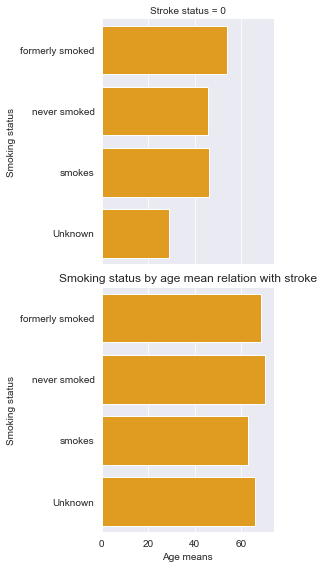

In [14]:
g = sns.FacetGrid(df_agemean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Age means', 'Smoking status' , color = 'orange')
plt.title('Smoking status by age mean relation with stroke')
plt.show()

### Smoking status by avg_glucose_level mean relation with stroke

In [15]:
# for saving mean values by smoking status
avg_mean_smoking_status_stroke_1 = []
avg_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    avg_mean_smoking_status_stroke_1.append(data.avg_glucose_level[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    avg_mean_smoking_status_stroke_0.append(data.avg_glucose_level[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , avg_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , avg_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_avg = np.concatenate((avg_mean_smoking_status_stroke_1 , avg_mean_smoking_status_stroke_0))
print('means concat : ' , means_avg)


Stroke status 1 : [132.80685714285713, 132.9072222222223, 139.98785714285717, 124.80893617021279]
Stroke status 0 : [111.17509202453975, 106.29204217536088, 106.21990629183395, 98.81012692050778]
means concat :  [132.80685714 132.90722222 139.98785714 124.80893617 111.17509202
 106.29204218 106.21990629  98.81012692]


In [16]:
# creating new dataframe 
df_avgmean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Avg glucose level means' : means_avg , 
                                                 'Stroke status' : stroke_status})
df_avgmean_smoking_status_stroke

,Smoking status,Avg glucose level means,Stroke status
0,formerly smoked,132.806857,1
1,never smoked,132.907222,1
2,smokes,139.987857,1
3,Unknown,124.808936,1
4,formerly smoked,111.175092,0
5,never smoked,106.292042,0
6,smokes,106.219906,0
7,Unknown,98.810127,0


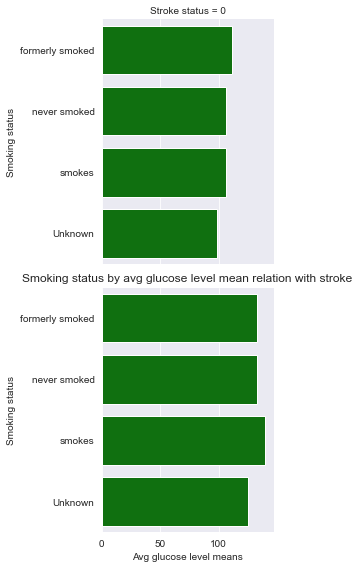

In [17]:
g = sns.FacetGrid(df_avgmean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Avg glucose level means', 'Smoking status' , color = 'green')
plt.title('Smoking status by avg glucose level mean relation with stroke')
plt.show()

### Smoking status by bmi mean relation with stroke

In [18]:
# for saving mean values by smoking status
bmi_mean_smoking_status_stroke_1 = []
bmi_mean_smoking_status_stroke_0 = []

for j in smoking_status:
    bmi_mean_smoking_status_stroke_1.append(data.bmi[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 1)].mean())
    bmi_mean_smoking_status_stroke_0.append(data.bmi[(data['smoking_status'] == '{}'.format(j)) & (data['stroke'] == 0)].mean())   

print('Stroke status 1 :' , bmi_mean_smoking_status_stroke_1)
print('Stroke status 0 :' , bmi_mean_smoking_status_stroke_0)

# concat the array for dataframe that we will create need to label 
means_bmi = np.concatenate((bmi_mean_smoking_status_stroke_1 , bmi_mean_smoking_status_stroke_0))
print('means concat : ' , means_bmi)

Stroke status 1 : [31.0140350877193, 30.43928571428572, 30.579487179487177, 29.351724137931036]
Stroke status 0 : [30.727692307692326, 29.96085972850679, 30.541547277936935, 25.592847317744145]
means concat :  [31.01403509 30.43928571 30.57948718 29.35172414 30.72769231 29.96085973
 30.54154728 25.59284732]


In [19]:
# creating new dataframe 
df_bmimean_smoking_status_stroke = pd.DataFrame({'Smoking status' : smoking_status_concat , 'Bmi level means' : means_bmi , 
                                                 'Stroke status' : stroke_status})
df_bmimean_smoking_status_stroke

,Smoking status,Bmi level means,Stroke status
0,formerly smoked,31.014035,1
1,never smoked,30.439286,1
2,smokes,30.579487,1
3,Unknown,29.351724,1
4,formerly smoked,30.727692,0
5,never smoked,29.960860,0
6,smokes,30.541547,0
7,Unknown,25.592847,0


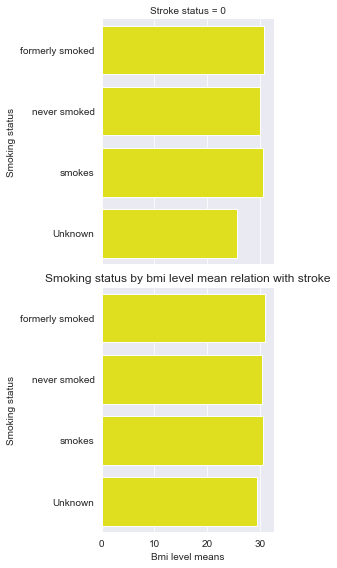

In [20]:
g = sns.FacetGrid(df_bmimean_smoking_status_stroke , row = 'Stroke status' , size = 4)
g.map(sns.barplot , 'Bmi level means', 'Smoking status' , color = 'yellow')
plt.title('Smoking status by bmi level mean relation with stroke')
plt.show()

### Genaral visualization for that we did feature engineering

In [21]:
# droppin the labels two data frame 
df_agemean_smoking_status_stroke.drop('Stroke status' , axis = 1 , inplace = True)
df_avgmean_smoking_status_stroke.drop('Stroke status' , axis = 1 , inplace = True)

df_avgmean_smoking_status_stroke.drop('Smoking status' , axis = 1 , inplace = True)
df_bmimean_smoking_status_stroke.drop('Smoking status' , axis = 1 , inplace = True)

In [22]:
# concat the dataframes 
df_general = pd.concat([df_agemean_smoking_status_stroke , df_avgmean_smoking_status_stroke , df_bmimean_smoking_status_stroke],
                      axis = 1)

In [23]:
df_general

,Smoking status,Age means,Avg glucose level means,Bmi level means,Stroke status
0,formerly smoked,68.628571,132.806857,31.014035,1
1,never smoked,70.311111,132.907222,30.439286,1
2,smokes,62.809524,139.987857,30.579487,1
3,Unknown,65.836596,124.808936,29.351724,1
4,formerly smoked,53.753374,111.175092,30.727692,0
5,never smoked,45.567703,106.292042,29.960860,0
6,smokes,46.212851,106.219906,30.541547,0
7,Unknown,29.112011,98.810127,25.592847,0


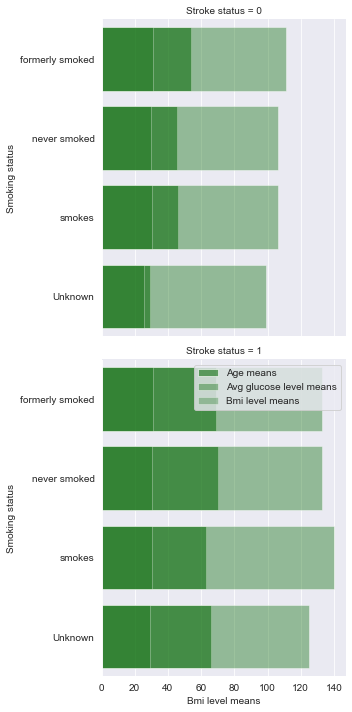

In [24]:
g = sns.FacetGrid(df_general , row = 'Stroke status' , size = 5)
g.map(sns.barplot , 'Age means' , 'Smoking status' , label = 'Age means' , color = 'green' , alpha = 0.6)
g.map(sns.barplot , 'Avg glucose level means' , 'Smoking status' , label = 'Avg glucose level means' , color = 'green' , alpha = 0.4)
g.map(sns.barplot , 'Bmi level means' , 'Smoking status' , label = 'Bmi level means' , color = 'green' , alpha = 0.3)
plt.legend()
plt.show()

### Density map of numerical values

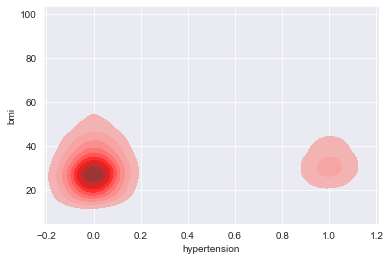

In [25]:
# hypertension and bmi relation
sns.kdeplot(x = 'hypertension' , y = 'bmi' , data = data , shade = True , color = 'red')
plt.show()

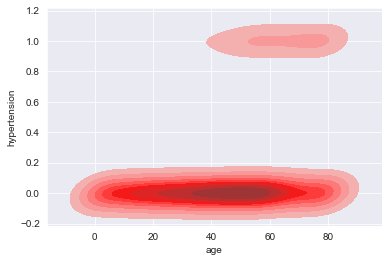

In [26]:
# hypertension and age relation
sns.kdeplot(x = 'age' , y = 'hypertension' , data = data , shade = True , color = 'red')
plt.show()

* We can see if hypertension is 1 actually the people have ever have a hypertension problem the age rises.

## Examined to median values in numerical values

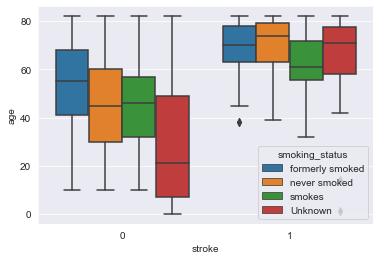

In [27]:
sns.boxplot(x = 'stroke' , y = 'age' , hue = 'smoking_status' , data = data)
plt.show()

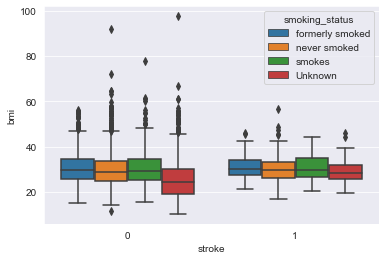

In [28]:
sns.boxplot(x = 'stroke' , y = 'bmi' , hue = 'smoking_status' , data = data)
plt.show()

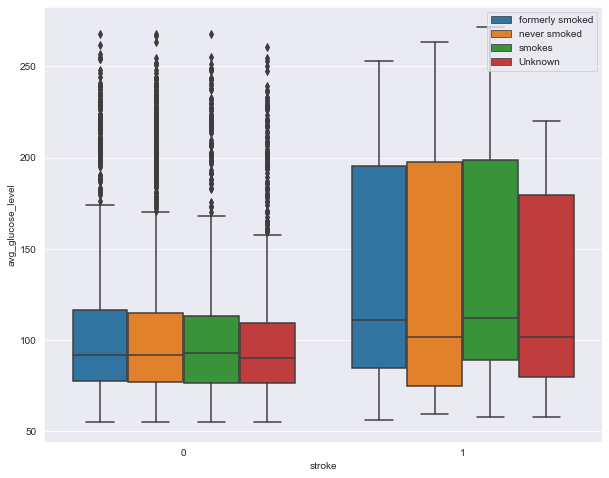

In [29]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = 'stroke' , y = 'avg_glucose_level' , hue = 'smoking_status' , ax = ax , data = data)
plt.legend(loc='upper right')
plt.show()

* We can see these plots with outlier values

## Control the outlier values for numerical values

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
# create a two list for store the indices and counting indices 
outlier_indices = []
outlier_values = []

In [32]:
# detecth the outliers 
def outlier_detecth(df , features):
    
    for i in features:
    
        # finding first quantie 
    
        Q1 = np.percentile(data[i] , 25)
        print('First quantie : ' , Q1)
    
        # finding third quantie 
    
        Q3 = np.percentile(data[i] , 75)
        print('Third quantie : ' , Q3)
    
        # calculate the IQR 
    
        IQR = Q3 - Q1
        print('The IQR : ' , IQR)
    
        # determine the threshold value 
    
        threshold_value = IQR * 1.5
        print('The outlier threshold value : ' , threshold_value )
    
        # detecth the outlier values 
    
        outlier_list = data[(data[i] < Q1 - threshold_value) | (data[i] > Q3 + threshold_value)].index
        
        # calculate the outlier values 
        
        outlier_indices.extend(outlier_list)
    
    outlier_values = Counter(outlier_indices)
    
    return outlier_values

In [33]:
outlier_values = outlier_detecth(data , ['avg_glucose_level' , 'age'])

First quantie :  77.24499999999999
Third quantie :  114.09
The IQR :  36.84500000000001
The outlier threshold value :  55.26750000000002
First quantie :  25.0
Third quantie :  61.0
The IQR :  36.0
The outlier threshold value :  54.0


In [34]:
outlier_values

Counter({0: 1,
         1: 1,
         3: 1,
         4: 1,
         5: 1,
         13: 1,
         14: 1,
         16: 1,
         17: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         32: 1,
         33: 1,
         36: 1,
         44: 1,
         45: 1,
         54: 1,
         55: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         66: 1,
         71: 1,
         73: 1,
         76: 1,
         90: 1,
         95: 1,
         97: 1,
         101: 1,
         102: 1,
         107: 1,
         113: 1,
         115: 1,
         122: 1,
         123: 1,
         124: 1,
         128: 1,
         130: 1,
         132: 1,
         134: 1,
         135: 1,
         137: 1,
         138: 1,
         139: 1,
         144: 1,
         149: 1,
         150: 1,
         151: 1,
         155: 1,
         157: 1,
         158: 1,
         163: 1,
         175: 1,
    

* The outlier values in two features that are age and avg_glucose_level.
* We can see the indices that has outlier numbers and the datas has no more that two outlier values.
* Finally we dont have to drop outlier values because it is'nt necessary just one outlier in any indices.

## Filling the missing value

In [35]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* The data has null values where columns is only 'bmi' 

In [36]:
# detecth null values in data
data[data['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


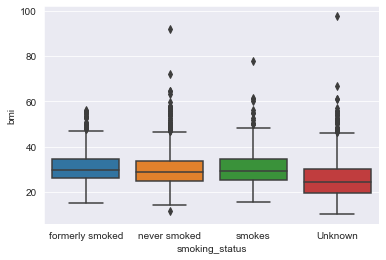

In [37]:
sns.boxplot(x = 'smoking_status' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of smoking_status
* There is no diffrences bmi value with smoking status.

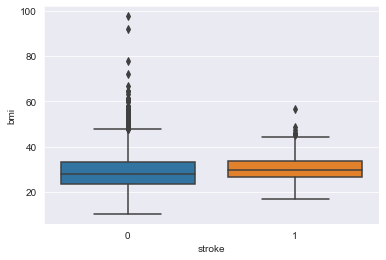

In [38]:
sns.boxplot(x = 'stroke' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of stroke status
* There is no diffrences bmi value with stroke status

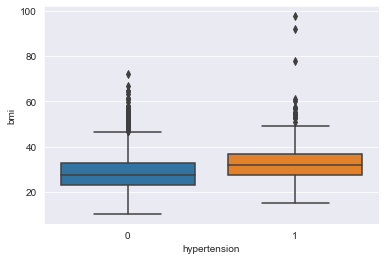

In [39]:
sns.boxplot(x = 'hypertension' , y = 'bmi' , data = data)
plt.show()

* We can filling with hypertension median values
* There is a diffrence and we can use this that we want to 

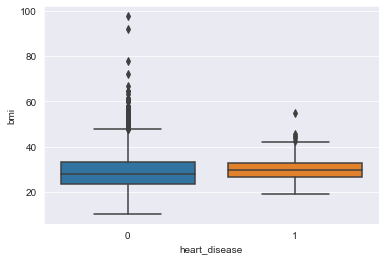

In [40]:
sns.boxplot(x = 'heart_disease' , y = 'bmi' , data = data)
plt.show()

* We can't filling to in dependent of hearth disase status
* There is no diffrences bmi value with hearth disase status

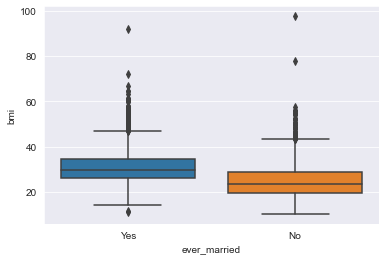

In [41]:
sns.boxplot(x = 'ever_married' , y = 'bmi' , data = data)
plt.show()

* We can filling with ever_married median values
* There is a diffrence and we can use this that we want to 

#### So finally we can use features that are hypertension and ever married, when we will fill the NaN values in bmi features

In [42]:
# store the null values's indexes
indexes_null = data[data['bmi'].isnull()].index

In [43]:
indexes_null

Int64Index([   1,    8,   13,   19,   27,   29,   43,   46,   50,   51,
            ...
            4790, 4921, 4934, 4949, 4984, 5039, 5048, 5093, 5099, 5105],
           dtype='int64', length=201)

In [44]:
bmi_pred = []
for i in indexes_null:
    # calculate the medians, we have indexes that null values in bmi feature 
    # bmi indexes where are null indexes in bmi feauture that is i 
    # and filling with that indexes where are hypertension and ever_maried median 
    bmi_pred = data['bmi'][((data['hypertension'] == data.iloc[i]['hypertension']) & 
                            (data['ever_married'] == data.iloc[i]['ever_married']))].median()
    # filling processes
    
    data['bmi'].loc[i] = bmi_pred

In [45]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Implement the PCA(Principle Component Analysis) data and 2D visualization

In [148]:
from sklearn.decomposition import PCA
z = data.drop(['stroke' , 'id'], axis = 1).values

# Encoding
z[:,0] = le.fit_transform(z[:,0]) # For gender 
z[:,4] = le.fit_transform(z[:,4]) # For married status 
z[:,5] = le.fit_transform(z[:,5]) # For work type
z[:,6] = le.fit_transform(z[:,6]) # For residance type
z[:,9] = le.fit_transform(z[:,9]) # For smoking status 

pca = PCA(n_components = 2, whiten = True) # we want two component for visialization
pca.fit(z) # detecth the our pca components

# conver the 2d 
z_pca = pca.transform(z)

# analyz the pca perform
print('The variances are : {}'.format(pca.explained_variance_ratio_))
print('The variance score is : {}'.format(sum(pca.explained_variance_ratio_)))

The variances are : [0.79650051 0.18268965]
The variance score is : 0.9791901609119908


* The variance score is very good the score that means our component too similaraty has with our real data

In [149]:
# Create a new dataframe for pca visulization
pca_2d_df = data.drop(['id'], axis = 1)
pca_2d_df

# new data frame encoding
pca_2d_df.iloc[:,0] = le.fit_transform(pca_2d_df.iloc[:,0]) # For gender 
pca_2d_df.iloc[:,4] = le.fit_transform(pca_2d_df.iloc[:,4]) # For married status 
pca_2d_df.iloc[:,5] = le.fit_transform(pca_2d_df.iloc[:,5]) # For work type
pca_2d_df.iloc[:,6] = le.fit_transform(pca_2d_df.iloc[:,6]) # For residance type
pca_2d_df.iloc[:,9] = le.fit_transform(pca_2d_df.iloc[:,9]) # For smoking status 

# add the pca components
pca_2d_df['p1'] = z_pca[:,0]
pca_2d_df['p2'] = z_pca[:,1]

pca_2d_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,p1,p2
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,2.732301,-0.228539
1,0,61.0,0,0,1,3,0,202.21,29.4,2,1,2.134927,-0.111428
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,0.121458,-1.668146
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,1.429185,0.176928
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,1.584857,-1.090511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,31.8,2,0,-0.357890,-1.823192
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0,0.546626,-1.613215
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0,-0.526577,0.193932
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0,1.322731,0.099070


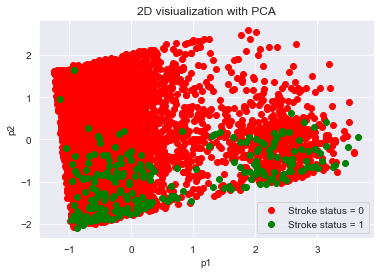

In [150]:
# create a color list for classification
color = ['red' , 'green']
labels = ['Stroke status = 0', 'Stroke status = 1']
for i, j, k in zip(color, labels, range(0,2)):
    plt.scatter(pca_2d_df.p1[pca_2d_df['stroke'] == k], 
                pca_2d_df.p2[pca_2d_df['stroke'] == k], 
                label = '{}'.format(j), color = i)

plt.legend(loc = 'best')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('2D visiualization with PCA')
plt.show()

## Obtained training and testing variables for learning proceses

In [136]:
# decleration variables for training and testing processes 
X = data.drop(['stroke' , 'id'] , axis = 1)
y = data.stroke

In [47]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.4,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,31.8,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


### Encoding catagorical features with label encoder for learning processes

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* We should encoding feature where dtype is 'object' because learning processes need to be numerical variables

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,0] = le.fit_transform(X.iloc[:,0]) # For gender 
X.iloc[:,4] = le.fit_transform(X.iloc[:,4]) # For married status 
X.iloc[:,5] = le.fit_transform(X.iloc[:,5]) # For work type
X.iloc[:,6] = le.fit_transform(X.iloc[:,6]) # For residance type
X.iloc[:,9] = le.fit_transform(X.iloc[:,9]) # For smoking status 

# Train and test splitting and try to balanced labels

In [137]:
from collections import Counter
Counter(y)

Counter({1: 249, 0: 4861})

* As we can see our data is imbalanced
* The thing that is imbalanced is a big problem for learning processes.
* Our main goal try to find a truely '1' labels because actually we want to predict stroke dangerous for people.
* So, what we should to do ? 
* Basicly, we should clone the minostry class.
* So, which one can we use for this process that i said to clone the minostry classes.
* We can use the SMOTETomek methods.
* There is a explanation for SMOTOETomek in README but i can say basicly mixing the Oversampling and Undersampling methods by using like a Knn algorithms.

In [52]:
# train and test splitting 
from sklearn.model_selection import train_test_split

# for balancing labels  
from imblearn.combine import SMOTETomek 
sm = SMOTETomek(random_state = 42) 

X, y = sm.fit_resample(X,y.ravel())

In [135]:
Counter(y)

Counter({1: 4795, 0: 4795})

* As we can see the diffrences with before the SMOTETomek processes
* Our data look like a balanced and ready to splitting for learning process!!

# Normalization for continous columns

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['age'] = sc.fit_transform(X['age'].values.reshape(-1,1))
X['avg_glucose_level'] = sc.fit_transform(X['avg_glucose_level'].values.reshape(-1,1))
X['bmi'] = sc.fit_transform(X['bmi'].values.reshape(-1,1))

* Okay, probably we will use the knn and like that algorithms and that algorithms use the euchlidean distance.
* We have to do normalization because if some distance dominater than the other distance it will be issue when we implement the learning algorithms that use the euchlidean distance.

In [129]:
# Splitting the training data testing data 
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42, stratify = y)

In [130]:
Counter(y_test)

Counter({0: 959, 1: 959})

* Our test data balanced too, it is great !

# Learning time!

## Optimization hyperparameters with RandomizedSearchCV

### Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report # for analyz the precsion recall and f1 score 
from sklearn.model_selection import RandomizedSearchCV # for optimization the models searching the best parameters actually
lr = LogisticRegression()

# hyperparameters for logistic regression
grid = {'C': [0.01 , 1 , 5]}

import time 

t0 = time.time()
rs = RandomizedSearchCV(lr, grid, cv = 10)
rs.fit(X_train, y_train)
t1 = time.time()

print('RandomizedCV time: {} seconds'.format(t1 - t0))
print('Best hyperparameter is : {}'.format(rs.best_params_))
print('Best validation score is : {}'.format(rs.best_score_))

RandomizedCV time: 0.7766022682189941 seconds
Best hyperparameter is : {'C': 5}
Best validation score is : 0.8171238388200782


* As we can see the time for RandomizedSearchCV and our best parameter with best score.
* There is a explanation for RandomizedCV and GridSearchCV.
* Basicly, gridsearchCV needs to CPU but randomizedCV needs to CHANCE! ahahaha

#### Fitting and testing model

Logistic Regression accuracy: 0.8044838373305526
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       959
           1       0.79      0.83      0.81       959

    accuracy                           0.80      1918
   macro avg       0.81      0.80      0.80      1918
weighted avg       0.81      0.80      0.80      1918



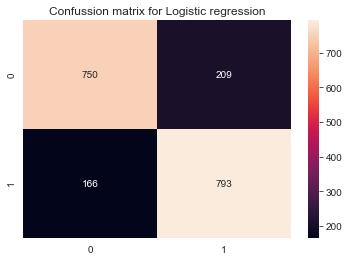

In [146]:
# Fitting process
lr = LogisticRegression(C = 5)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_predict = lr.predict(X_test) # our predictions 

#Testing processes
print('Logistic Regression accuracy: {}'.format(lr_score))
print(classification_report(y_test, lr_predict)) # report the precison recall and f1 score 

# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_predict)
sns.heatmap(cm_lr, annot = True , fmt = '0.0f')
plt.title('Confussion matrix for Logistic regression')
plt.show()

* First off all we can analyz the our scores but generally if we have a imbalance data actually, accuracy it's not neccesssary for us because we might predict perpetual dominant labels we dont predict the minorty class and this thing that is calling with USELESS model. :) So we should analyz the mainly 'recall', 'precision' and F1 scores it is more understandable that accuaracy.

* So our we had a also optimizated values in classification report we had good values that are precision, recall and F1 scores for our minorty classes.

* Our confusion matrix has also good TP,FP,TN,FN values actually not half bad by data. 

* There is a explanations for these metrics that are precision, recall, F1 score, confussion matrix.

#### Learning Curve 

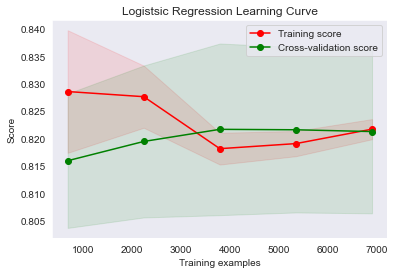

In [147]:
#!pip install scikit-plot
from scikitplot.estimators import plot_learning_curve
plot_learning_curve(lr, X_train, y_train, cv = 10, scoring = 'f1')
plt.title('Logistsic Regression Learning Curve' )
plt.show()

* As we can see, we had a not half bad curves.
* We had a some indecision in crossvalidation.

### Knn Classification

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# hyperparameters for knn 
grid = {'weights' : ['uniform', 'distance'] , 'n_neighbors' : range(1,30)}

import time 

t0 = time.time()
rs = RandomizedSearchCV(knn, grid, cv = 10)
rs.fit(X_train, y_train)
t1 = time.time()

print('RandomizedCV time: {} seconds'.format(t1 - t0))
print('Best hyperparameter is : {}'.format(rs.best_params_))
print('Best validation score is : {}'.format(rs.best_score_))

RandomizedCV time: 8.163774728775024 seconds
Best hyperparameter is : {'weights': 'distance', 'n_neighbors': 10}
Best validation score is : 0.8879036967622772


#### Fitting and testing model

Knn accuracy: 0.8790406673618353
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       959
           1       0.84      0.94      0.89       959

    accuracy                           0.88      1918
   macro avg       0.88      0.88      0.88      1918
weighted avg       0.88      0.88      0.88      1918



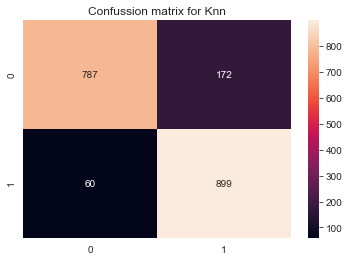

In [167]:
# Fitting process
knn = KNeighborsClassifier(weights = 'uniform' , n_neighbors = 10)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
knn_predict = knn.predict(X_test) # our predictions 

#Testing processes
print('Knn accuracy: {}'.format(knn_score))
print(classification_report(y_test, knn_predict)) # report the precison recall and f1 score 

# Confusion Matrix
cm_lr = confusion_matrix(y_test, knn_predict)
sns.heatmap(cm_lr, annot = True , fmt = '0.0f')
plt.title('Confussion matrix for Knn')
plt.show()

* We have better perform algotrithm that is logistic regression 
* So succesfully result because we want to detecth stroke dangerous for people.
* We had a balanced values that are precision, recall, f1-score.

### Learning curve

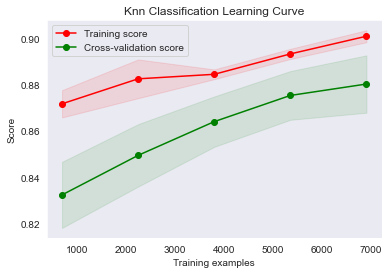

In [168]:
plot_learning_curve(knn, X_train, y_train, cv = 10, scoring = 'f1')
plt.title('Knn Classification Learning Curve' )
plt.show()

* We had some bayes diffrences :( 

### Decision Tree 

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# hyperparameters for knn 
grid = {'max_depth': range(1,5)}

import time 

t0 = time.time()
rs = RandomizedSearchCV(dt, grid, cv = 10)
rs.fit(X_train, y_train)
t1 = time.time()

print('RandomizedCV time: {} seconds'.format(t1 - t0))
print('Best hyperparameter is : {}'.format(rs.best_params_))
print('Best validation score is : {}'.format(rs.best_score_))

RandomizedCV time: 0.4477999210357666 seconds
Best hyperparameter is : {'max_depth': 4}
Best validation score is : 0.8179088236093002


Knn accuracy: 0.8169968717413972
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       959
           1       0.76      0.92      0.83       959

    accuracy                           0.82      1918
   macro avg       0.83      0.82      0.82      1918
weighted avg       0.83      0.82      0.82      1918



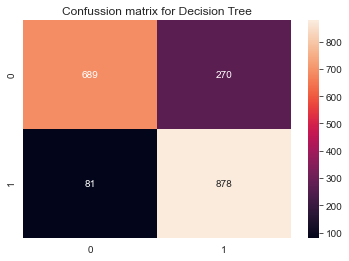

In [196]:
# Fitting process
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train) 
dt_score = dt.score(X_test, y_test)
dt_predict = dt.predict(X_test) # our predictions 

#Testing processes
print('Knn accuracy: {}'.format(dt_score))
print(classification_report(y_test, dt_predict)) # report the precison recall and f1 score 

# Confusion Matrix
cm_lr = confusion_matrix(y_test, dt_predict)
sns.heatmap(cm_lr, annot = True , fmt = '0.0f')
plt.title('Confussion matrix for Decision Tree')
plt.show()

### Learning curve

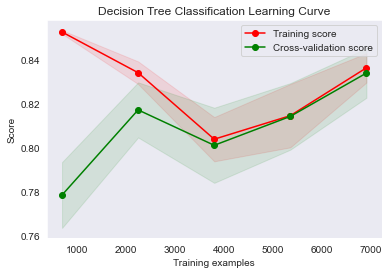

In [195]:
plot_learning_curve(dt, X_train, y_train, cv = 10, scoring = 'f1')
plt.title('Decision Tree Classification Learning Curve' )
plt.show()

* So, DecisionTrees algorithms sooo dangerous in learning models.
* Because the decisontrees has often overfitting status, so if dt model has overfitting what we should to do ?
* Actually there is a a lot of paramaters for this thing that is issue with overfitting status.
* But people often the decrase the 'max_depth' parameters when the dt model has a overfitting. This thing actually like tree surgery.